In [13]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imshow
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.models import Sequential

from keras.applications import vgg16
from keras.applications.vgg16 import VGG16
from keras.models import Sequential

In [7]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

Closed=load_images_from_folder('dataset_Eyes_processed/closedLeftEyes/')+load_images_from_folder('dataset_Eyes_processed/closedRightEyes/')
Open=load_images_from_folder('dataset_Eyes_processed/openLeftEyes/')+load_images_from_folder('dataset_Eyes_processed/openRightEyes/')
len(Open),len(Closed)

(2462, 2384)

In [8]:
Ones=np.ones((1,1231*2), np.int8).T
Zeros=np.zeros((1,1192*2), np.int8).T
Ones.shape,Zeros.shape

((2462, 1), (2384, 1))

In [9]:
X = np.array(Open+Closed)/255
Y = np.concatenate((Ones,Zeros))
X.shape,Y.shape

((4846, 24, 24, 3), (4846, 1))

In [10]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state=123)
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 3876
number of test examples = 970
X_train shape: (3876, 24, 24, 3)
Y_train shape: (3876, 1)
X_test shape: (970, 24, 24, 3)
Y_test shape: (970, 1)


Image shape : (24, 24, 3) 
class: [1]


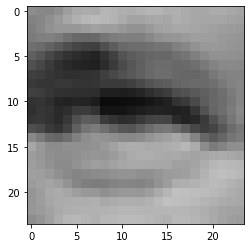

In [11]:
print("Image shape :",X_train[5].shape,'\nclass:',Y_train[5])
imshow(X_train[5])

In [48]:
# vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(24, 24, 3)) 

# output = vgg.layers[-1].output
# output = Flatten()(output)
# vgg_model = Model(vgg.input, output)

# vgg_model.trainable = False
# for layer in vgg_model.layers:
#     layer.trainable = False
###########################################################
# model = Sequential()
# model.add(Conv2D(filters=24, kernel_size=(7,7), activation='relu', padding='same',
#                 input_shape=(24, 24, 3)))
# model.add(Dense(512, activation='relu', input_dim=(24, 24, 3)))
# model.add(Dropout(0.3))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))

# model.summary()
############################################################
model = Sequential([Conv2D(filters=128, kernel_size=(7,7), activation='relu', padding='same',
                     input_shape=(24, 24, 3)),
                     BatchNormalization(),
                     MaxPooling2D(pool_size=(2,2)),
                     Flatten(),
                     Dense(units =1, activation='sigmoid') ])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 128)       18944     
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 18433     
Total params: 37,889
Trainable params: 37,633
Non-trainable params: 256
_________________________________________________________________


In [49]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

In [50]:
X_train.shape,Y_train.shape

((3876, 24, 24, 3), (3876, 1))

In [51]:
history_model = model.fit(X_train, Y_train,
                    batch_size=1,
                    epochs=10)

Epoch 1/10
3876/3876 [==============================] - 10s 2ms/step - loss: 0.4590 - accuracy: 0.8225
Epoch 2/10
3876/3876 [==============================] - 9s 2ms/step - loss: 0.3114 - accuracy: 0.8767
Epoch 3/10
3876/3876 [==============================] - 9s 2ms/step - loss: 0.2960 - accuracy: 0.8904
Epoch 4/10
3876/3876 [==============================] - 9s 2ms/step - loss: 0.2572 - accuracy: 0.9025
Epoch 5/10
3876/3876 [==============================] - 9s 2ms/step - loss: 0.2074 - accuracy: 0.9182
Epoch 6/10
3876/3876 [==============================] - 9s 2ms/step - loss: 0.1956 - accuracy: 0.9293
Epoch 7/10
3876/3876 [==============================] - 9s 2ms/step - loss: 0.2154 - accuracy: 0.9169
Epoch 8/10
3876/3876 [==============================] - 9s 2ms/step - loss: 0.1856 - accuracy: 0.9247
Epoch 9/10
3876/3876 [==============================] - 9s 2ms/step - loss: 0.1671 - accuracy: 0.9329
Epoch 10/10
3876/3876 [==============================] - 9s 2ms/step - loss: 0.16

In [52]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=32)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

31/31 [==============================] - 0s 8ms/step - loss: 0.2568 - accuracy: 0.9062
Test loss: 0.2568 accuracy: 0.9062


In [55]:
model.save('eye_model')

INFO:tensorflow:Assets written to: trained_models\assets


In [53]:
Y_pred=model.predict(X_test)
cpt = 0
for i in range(970):
    if int(Y_pred[i])==Y_test[i]:
        cpt+=1
print(cpt/970)

0.49896907216494846


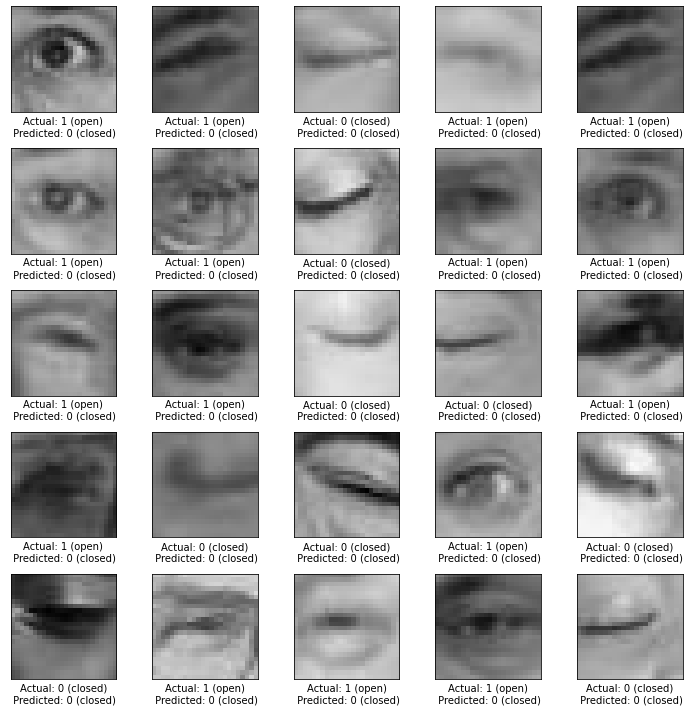

In [54]:
import matplotlib.pyplot as plt

Y_pred=model.predict(X_test)
labels=['closed','open']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 970) 
    imshow(X_test[img_index])
    
    actual_label = int(Y_test[img_index])
    predicted_label = int(Y_pred[img_index])
    
    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, labels[actual_label], predicted_label, labels[predicted_label]
    ))

plt.tight_layout()
plt.show()

In [79]:
from tensorflow import keras
model = keras.models.load_model('eye_model')

# Tester 1

In [96]:
cap = cv2.VideoCapture(0)
#face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye_tree_eyeglasses.xml')
while cv2.waitKey(1) != 27:
    has_frame, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect the eyes
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    # Draw the rectangle around each face
    predicted=[]
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        predicted.append(cv2.resize(img[y:y+h,x:x+w], (24,24)))
    if len(predicted)>1:
        pred=model.predict(np.array(predicted))
        cv2.putText(img,str(int(pred[0]))+'  '+str(int(pred[1])),(50,50),cv2.FONT_HERSHEY_COMPLEX,.8,(0,255,0),2)
    cv2.imshow('img', img)
cv2.destroyAllWindows()

# Tester 2

In [103]:
cap = cv2.VideoCapture(0)
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye_tree_eyeglasses.xml')
while cv2.waitKey(1) != 27:
    has_frame, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect the eyes
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    # Draw the rectangle around each face
    predicted=[]
    if len(eyes)==1:
        for (x, y, w, h) in eyes:
            cv2.rectangle(img, (x+40, y+50), (x+int(w/2)-20, y+int(h/2)), (255, 0, 0), 2)
            cv2.rectangle(img, (x+int(w/2)+20, y+50), (x+w-40, y+int(h/2)), (255, 0, 0), 2)
            predicted.append(cv2.resize(img[y:y+int(h/2),x:x+int(w/2)], (24,24)))
            predicted.append(cv2.resize(img[y:y+int(h/2),x+int(w/2):x+w], (24,24)))
    if len(predicted)>1:
        pred=model.predict(np.array(predicted))
        cv2.putText(img,str(int(pred[0]))+'  '+str(int(pred[1])),(50,50),cv2.FONT_HERSHEY_COMPLEX,.8,(0,255,0),2)
    cv2.imshow('img', img)
cv2.destroyAllWindows()